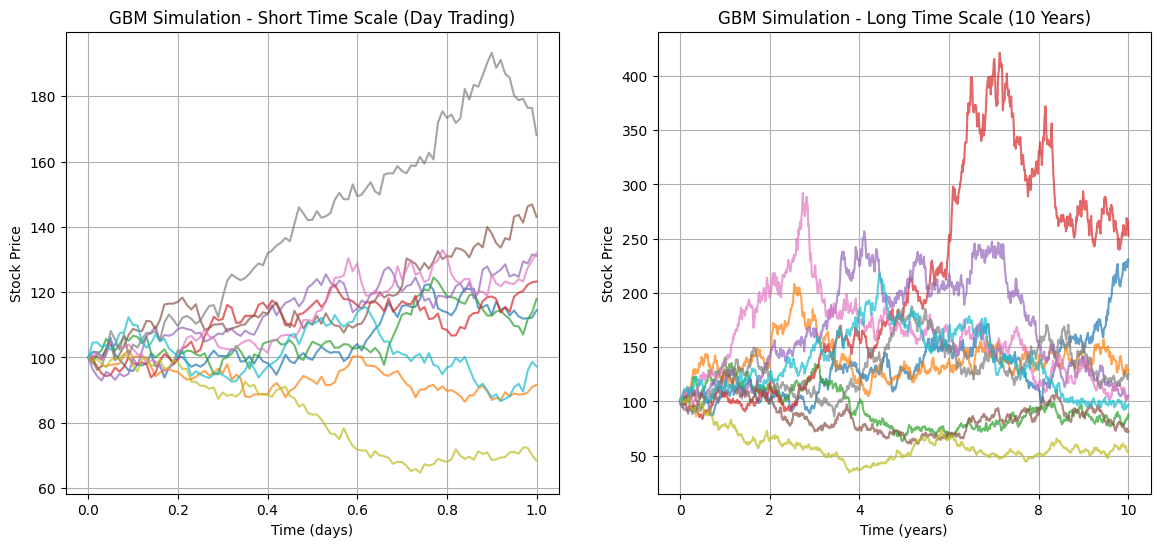

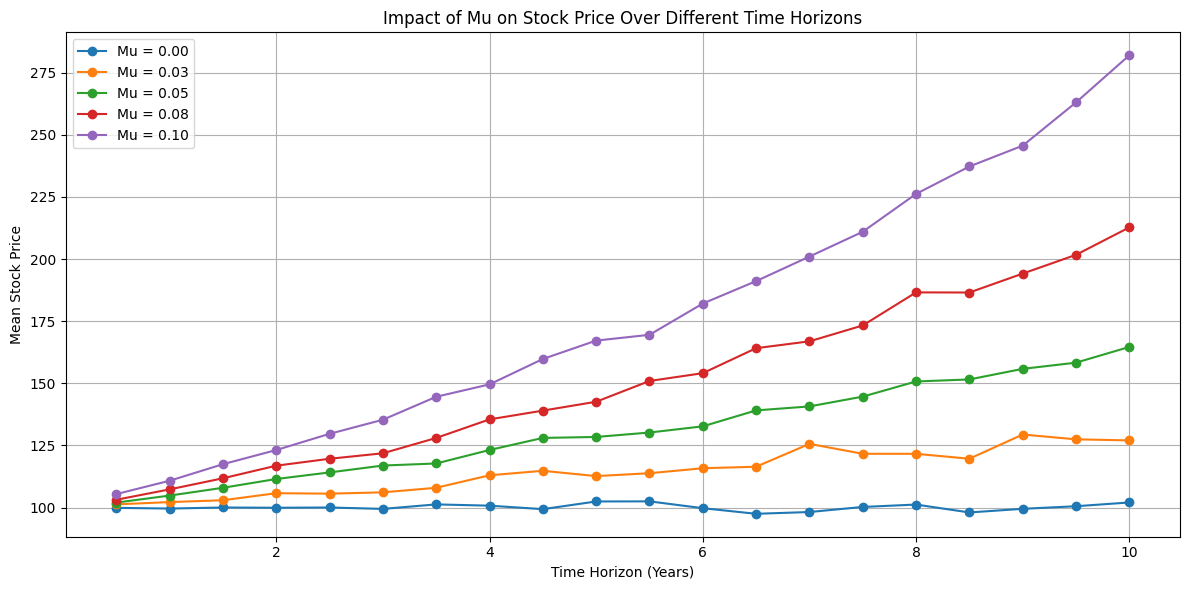

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, dt, n_paths):
    n_steps = int(T / dt)
    times = np.linspace(0, T, n_steps + 1)
    S = np.zeros((n_paths, n_steps + 1))
    S[:, 0] = S0

    for t in range(1, n_steps + 1):
        Z = np.random.standard_normal(n_paths)
        dS = mu * S[:, t - 1] * dt + sigma * S[:, t - 1] * np.sqrt(dt) * Z
        S[:, t] = S[:, t - 1] + dS

    return times, S

def simulate_gbm_mean(S0, mu, sigma, T, dt, n_paths):
    n_steps = int(T / dt)
    S = np.zeros((n_paths, n_steps + 1))
    S[:, 0] = S0

    for t in range(1, n_steps + 1):
        Z = np.random.standard_normal(n_paths)
        dS = mu * S[:, t - 1] * dt + sigma * S[:, t - 1] * np.sqrt(dt) * Z
        S[:, t] = S[:, t - 1] + dS

    return np.mean(S[:, -1])

def main():
    S0 = 100
    mu = 0.05
    sigma = 0.2 
    T_short = 1
    T_long = 10
    dt = 0.01
    n_paths = 1000
    mu_values = np.linspace(0, 0.1, 5)
    T_values = np.arange(0.5, 10.5, 0.5)

    times_short, S_short = simulate_gbm(S0, mu, sigma, T_short, dt, n_paths)
    times_long, S_long = simulate_gbm(S0, mu, sigma, T_long, dt, n_paths)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    for i in range(min(n_paths, 10)):
        plt.plot(times_short, S_short[i, :], alpha=0.7)
    plt.title("GBM Simulation - Short Time Scale (Day Trading)")
    plt.xlabel("Time (days)")
    plt.ylabel("Stock Price")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    for i in range(min(n_paths, 10)):
        plt.plot(times_long, S_long[i, :], alpha=0.7)
    plt.title("GBM Simulation - Long Time Scale (10 Years)")
    plt.xlabel("Time (years)")
    plt.ylabel("Stock Price")
    plt.grid(True)


    mean_prices = []
    for mu in mu_values:
        mean_prices_for_mu = [simulate_gbm_mean(S0, mu, sigma, T, dt, n_paths) for T in T_values]
        mean_prices.append(mean_prices_for_mu)

    # Plotting
    plt.figure(figsize=(12, 6))
    for i, mu in enumerate(mu_values):
        plt.plot(T_values, mean_prices[i], marker='o', label=f"Mu = {mu:.2f}")
    
    plt.title("Impact of Mu on Stock Price Over Different Time Horizons")
    plt.xlabel("Time Horizon (Years)")
    plt.ylabel("Mean Stock Price")
    plt.legend()
    plt.grid(True)


    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()